# Differential voltage analysis implementation
- This notebook is used to demonstrate the differential voltage analysis used in the paper.
- The fitting results for the entire dataset is saved in data/electrode_info_04152024.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import sys 
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..', 'src')
sys.path.append(src_dir)
from DVF_functions import *

### Data loading  

In [4]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, '..')
pe = pd.read_csv(os.path.join(data_dir, 'data/dvf_data/pe_cycle_1.csv'))
ne = pd.read_csv(os.path.join(data_dir,'data/dvf_data/ne_cycle_020224.csv'))

### Prepare the half/full cell data

In [5]:
window = 9
df_pe = smooth_pe(pe, window)
df_ne = smooth_ne(ne, window)

In [6]:
df_full_169 = process_full_test(os.path.join(data_dir, 'data/dvf_data/full_C_20_169.csv'))
df_full_106 = process_full_test(os.path.join(data_dir, 'data/dvf_data/full_C_20_106.csv'))

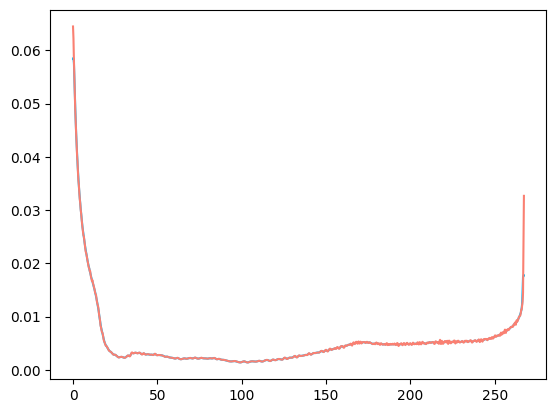

In [7]:
df = df_full_169
dvdq = np.divide(np.gradient(df['Voltage_sm']), np.gradient(df['Q']))
plt.plot(df['Q'], dvdq, color="deepskyblue") 
dvdq = np.divide(np.gradient(df['Voltage_aligned']), np.gradient(df['Q']))
plt.plot(df['Q'], dvdq, color="salmon") 

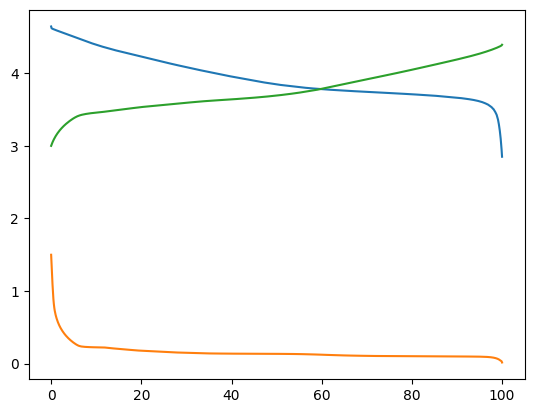

In [8]:
plt.plot(df_pe['SOC_aligned'], df_pe['Voltage_aligned'])
plt.plot(df_ne['SOC_aligned'], df_ne['Voltage_aligned'])
plt.plot(df_full_169['Q']*100/df_full_169['Q'].max(), df_full_169.Voltage_aligned)

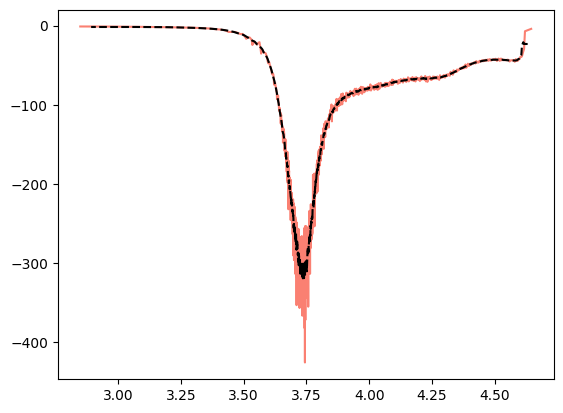

In [9]:
plot_dqdv(df_pe, '-', 'salmon', 'Voltage_aligned')
plot_dqdv(df_pe, '--', 'k', 'Voltage_sm')

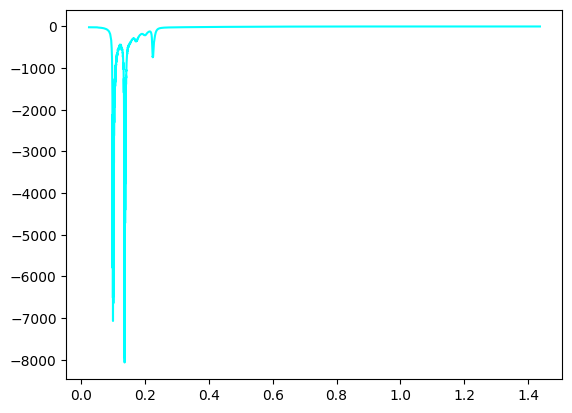

In [10]:
plot_dqdv(df_ne, '-', 'cyan', 'Voltage_sm')
# plot_dqdv(df_ne, '-', 'b', 'Voltage_aligned')

(0.0, 0.03)

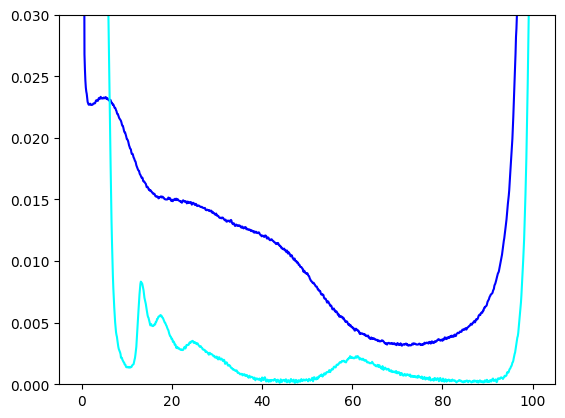

In [11]:
fig, ax = plt.subplots()
plot_dvdq_ele(df_pe, '-', 'b', 'Voltage_sm', ax)
plot_dvdq_ele(df_ne, '-', 'cyan', 'Voltage_sm', ax)
plt.ylim([0, 0.03])

In [12]:
voltage = 'Voltage_sm' 
bounds = [(200,  299), (200, 300), (0, 120), (0, 120), (0, 120)]
full_cell = df_full_169
res_169 =scipy.optimize.shgo(simulation_error, bounds, args=(df_pe, df_ne, df_full_169, voltage))
res_169

 message: Optimization terminated successfully.
 success: True
     fun: 0.0024542469886520805
    funl: [ 2.454e-03]
       x: [ 2.990e+02  2.957e+02  1.531e+00  9.716e+01  3.334e+00]
      xl: [[ 2.990e+02  2.957e+02  1.531e+00  9.716e+01  3.334e+00]]
     nit: 1
    nfev: 523
   nlfev: 490
   nljev: 80
   nlhev: 0

In [13]:
voltage = 'Voltage_sm' 
bounds = [(200,  400), (200, 400), (0, 120), (0, 120), (0, 120)]
full_cell = df_full_106
res_106 =scipy.optimize.shgo(simulation_error, bounds, args=(df_pe, df_ne, df_full_106, voltage))
res_106

 message: Optimization terminated successfully.
 success: True
     fun: 0.0032893966297513617
    funl: [ 3.289e-03]
       x: [ 3.069e+02  2.923e+02  1.042e+00  9.314e+01  1.880e+00]
      xl: [[ 3.069e+02  2.923e+02  1.042e+00  9.314e+01  1.880e+00]]
     nit: 1
    nfev: 477
   nlfev: 444
   nljev: 73
   nlhev: 0

### Functions to visualize the fit 

(0.0042991226328450175,
 92.06432306386486,
 5.62478396498976,
 267.36123729999997,
 291.90561172283464)

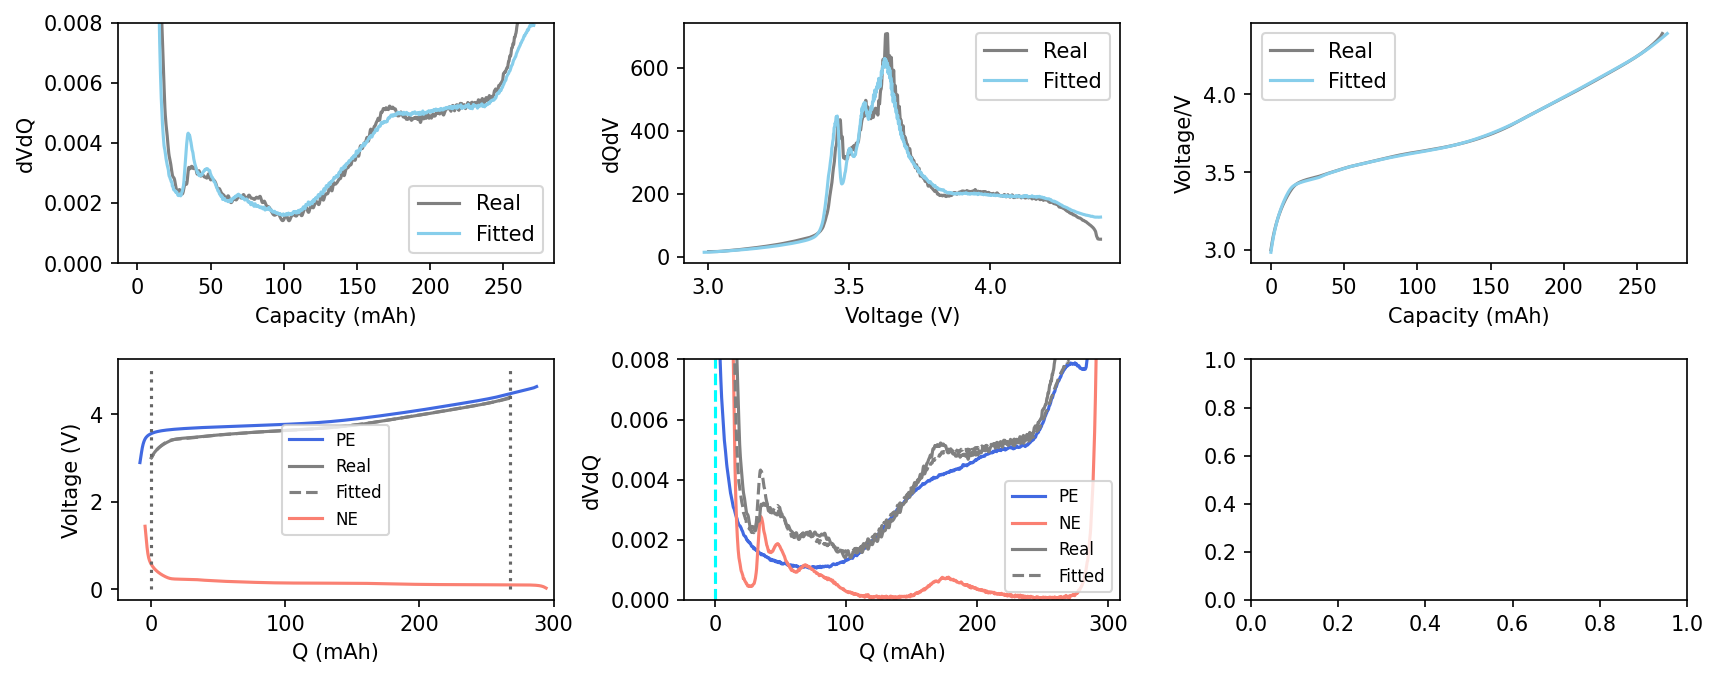

In [14]:
process_fitting_results(res_169, df_full_169, df_ne, df_pe, 1, voltage)
# plt.savefig('fitting_results_slow.pdf', transparent = True, bbox_inches='tight')

(0.005222905859032041,
 84.41327277303333,
 5.597986830716522,
 253.98714700000002,
 275.42713587801)

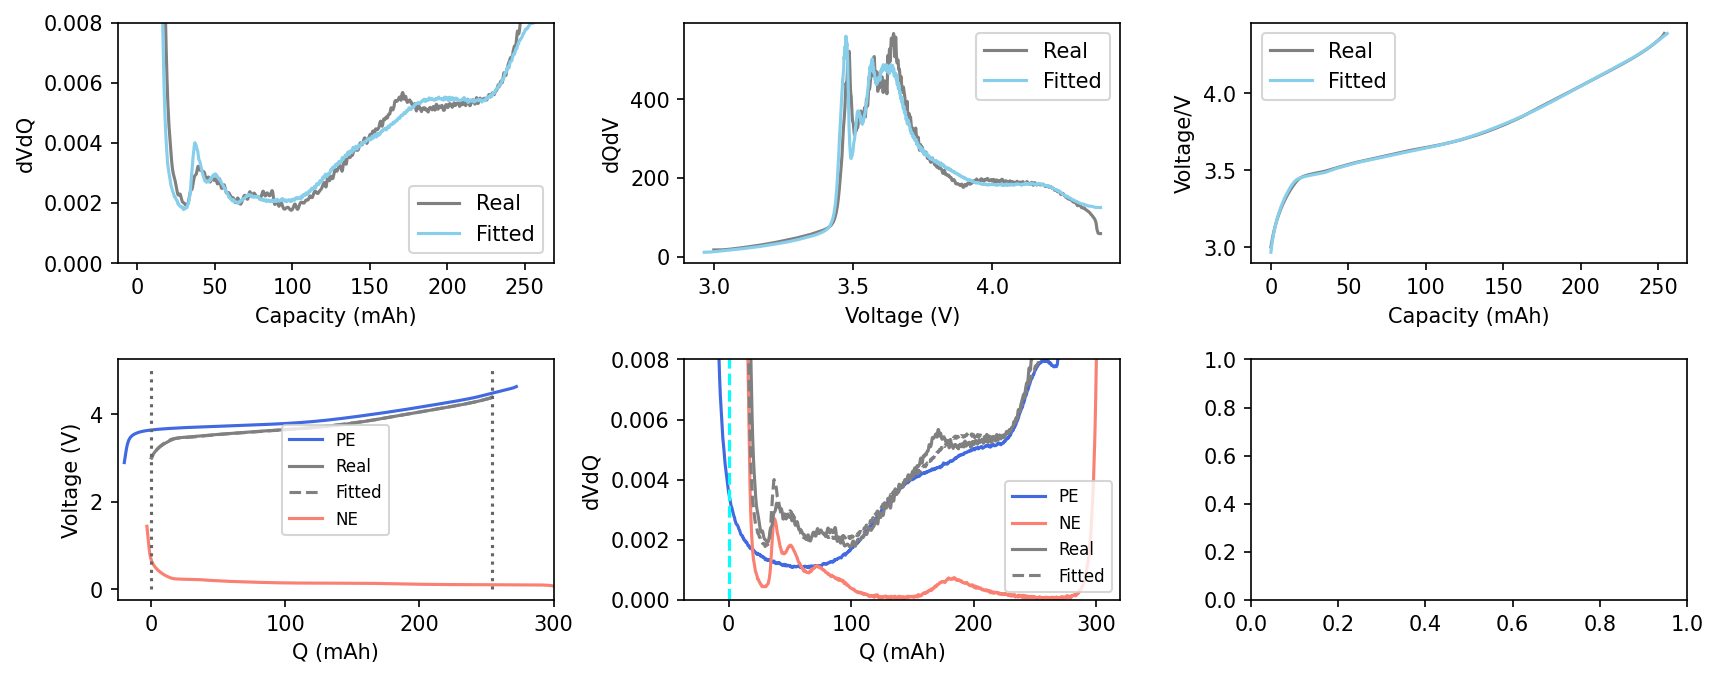

In [15]:
process_fitting_results(res_106, df_full_106, df_ne, df_pe, 1, voltage)
# plt.savefig('fitting_results_fast.pdf', transparent = True, bbox_inches='tight')